# STINTSY Major Course Output

*S12 - Ryan Jay Deculawan, Hyenne Audrey Lim, Viktoria Lila Sicuan*

## 1. Introduction

Soccer's extraordinary global appeal, with 3.5 billion supporters worldwide, cements its position as the most watched sport on the planet. Soccer creates a common passion that brings people from all walks of life together (The Most Popular Sports In The World, n.d.). This worldwide sport has the remarkable potential to cross cultural, language, and geographical borders, bringing people together from all walks of life. Fans congregate in their homes, bars, or stadiums to form a feeling of community and shared identity. Soccer's ongoing popularity stems from its capacity to bring together people of all ages and skill levels, making it more than simply a game but a celebration of athleticism, teamwork, and the universal spirit of competitiveness.

Soccer's enormous commercial worth is clear in the huge sums it earns for numerous leagues throughout the world. Soccer leagues have the highest TV viewership of any sports league, which contributes greatly to the sport's economic supremacy. The World Cup, the flagship event, is the embodiment of this phenomena, easily outshining every other significant athletic event. The tremendous viewership and worldwide influence of the World Cup highlight soccer's power to captivate the collective interest and intrigue of audiences on an unprecedented scale, transforming it into more than simply a game but a global cultural phenomenon. Soccer's economic impact, paired with its exciting dynamics, solidifies it as a sporting superpower that crosses geographical and cultural barriers (The World’s Most Watched Sports, 2017).

### Problem

Home advantage, which occurs in all sports, including soccer, is caused by a mix of psychological and physiological variables. The presence of ardent supporters fosters a supportive and motivational environment for the home side while perhaps influencing referee decisions owing to crowd reactions. Furthermore, the physical and emotional exhaustion involved with travel for visiting teams contributes to the home edge. The familiarity with the particular qualities of the home field, like as pitch size and surface, further tilts the scale in favor of the home side. Home advantage is essentially a complicated interaction of crowd support, referee dynamics, travel-related obstacles, and field familiarity that shapes the competitive landscape of sports (Zheng, 2015).

With this in mind, our objective is to investigate the feasibility of forecasting home advantage based on a snapshot of soccer matches. This project intends to emphasize the complex problems of applying modeling tools to real-life events, particularly in the dynamic environment of soccer matches. These machine learning models can help teams plan better strategies by offering insights into their opponents' strengths and weaknesses, such as knowing whether it is strategically better to play aggressively given the statistics of the match. Fans may also appreciate the game on a whole new level through the analysis of data and understanding the aspects that contribute to a team's success. Furthermore, predictive models can assist spectators in making better educated predictions about the outcome of a game, which can increase the enjoyment of watching the game.

## 2. Description of the Dataset

To address the identified task, the Sports dataset was selected. This dataset contains 7000 random snapshots from soccer matches. This dataset was used as part of a [Kaggle Community Prediction Competition](https://www.kaggle.com/competitions/sports-trading-will-there-be-more-goals/overview).

One row in the dataset represents one snapshot of a match while one column represents one feature of a match. As mentioned, there are **7000 instances** (rows), and **21 features** (columns). The features of the dataset are as follows:

1. `uuid` - The unique identifier of the snapshot
2. `current_minute` - The current minute of the in-play match. The 15 minute half-time break is included so a match has a total of 105 minutes. A current_minute of 70 corresponds to the actual match time of 55.
3. `home_score` - Goals scored by the home team as of this current_minute
4. `away_score`– Goals scored by the away team as of this current_minute
5. `home_yellow_cards` - Yellow cards given to the home team as of this current_minute
6. `away_yellow_cards` - Yellow cards given to the away team as of this current_minute
7. `home_red_cards` - Red cards given to the home team as of this current_minute
8. `away_red_cards` - Red cards given to the away team as of this current_minute
9. `home_attacks` - Attacks attempted by the home team as of this current_minute
10. `away_attacks` - Attacks attempted by the away team as of this current_minute
11. `home_dangerous_attacks` - Dangerous attacks attempted by the home team as of this current_minute
12. `away_dangerous_attacks` - Dangerous attacks attempted by the away team as of this current_minute
13. `home_corners` - Corners awarded to the home team as of this current_minute
14. `away_corners` - Corners awarded to the away team as of this current_minute
15. `home_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the home team as of this current_minute
16. `away_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the away team as of this current_minute
17. `home_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the home team as of this current_minute`
18. `away_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the away team as of this current_minute`
19. `home_possession` - How much ball possession in % did the home team have until this current_minute`
20. `away_possession` - How much ball possession in % did the away team have until this current_minute`
21. `final_delta` - The intended target value for each instance. Given that this dataset is from a competition, this column was provided as the value to be predicted for an instance's set of features.

## 3. List of Requirements

The following are the libraries and modules used to run the notebook.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import uniform
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 4. Data Preprocessing and Cleaning

In [ ]:
#read csv file
data = pd.read_csv('sports.csv')

In [ ]:
print(data.info())

Given that the `final_delta` and `uuid` columns do not contribute to the characterization of each soccer match timestamp, these are dropped.

In [ ]:
data.drop(["uuid", "final_delta"], axis=1, inplace=True)
print(data.columns)

In [ ]:
#There are 14 instances where the current minute is <0. 
#Given that these are only 14, and our total data size is 7000, we can opt to remove them.

#First: Collect the indexes of the to-be-removed rows
indices = list(data[data['current_minute'] < 0].index)

#Second: remove the rows using .drop 
data = data.drop(indices)

In [ ]:
#Now, lets check, if these outliers are still present.
data[data['current_minute'] < 0]
#Hooray (dejk) 

TODO: *Perform preprocessing and cleaning; move dropping < 0 minute rows here etc.*

## 5. Exploratory Data Analysis

In this section, we will perform Exploratory Data Analysis to gain insights into the distribution and characteristics of our dataset.

In this section, we will analyze the trend of each feature to the labels (genres) with 4 levels of Univariate analysis. To further understand the sampled data, we used graphs to show the shape of the distribution, its central value, and its variability. 

**Central Tendencies**

| Measure   | Description                                           |
|-----------|-------------------------------------------------------|
| Mean      | The average value of the dataset.                     |
| Median    | The middle value of the dataset, less sensitive to outliers. |
| Mode      | The most frequently occurring value in the dataset.   |

### Calculating for Central Tendencies

In [ ]:
central_tendencies = pd.DataFrame({
    'Mean': data.iloc[:, 1:].mean(),
    'Median': data.iloc[:, 1:].median(),
    'Mode': data.iloc[:, 1:].mode().iloc[0]
})
central_tendencies = central_tendencies.reset_index()
central_tendencies = central_tendencies.rename(columns={'index': 'Feature'})

| Feature                    | Mean      | Median | Mode | Insights                                          |
|----------------------------|-----------|--------|------|---------------------------------------------------|
| home_score                 | 0.80      | 0.0    | 0    | Low average scores, frequent matches with zero goals |
| away_score                 | 0.62      | 0.0    | 0    | Similar trend as home scores                        |
| home_yellow_cards          | 0.52      | 0.0    | 0    | Low average cards, many matches without cards       |
| away_yellow_cards          | 0.60      | 0.0    | 0    | Similar trend as home yellow cards                  |
| home_red_cards             | 0.01      | 0.0    | 0    | Low average red cards, common matches without red cards |
| away_red_cards             | 0.02      | 0.0    | 0    | Similar trend as home red cards                     |
| home_attacks               | 46.41     | 43.0   | 0    | Moderate average attacks, some matches with zero attacks |
| away_attacks               | 43.37     | 41.0   | 0    | Similar trend as home attacks                      |
| home_dangerous_attacks     | 27.64     | 25.0   | 0    | Moderate average dangerous attacks, some matches with zero attacks |
| away_dangerous_attacks     | 24.23     | 21.0   | 0    | Similar trend as home dangerous attacks            |
| home_corners               | 2.38      | 2.0    | 0    | Moderate average corners, some matches with zero corners |
| away_corners               | 1.99      | 1.0    | 0    | Similar trend as home corners                      |
| home_off_target            | 3.07      | 2.0    | 0    | Moderate average shots off target, some matches with zero shots off target |
| away_off_target            | 2.60      | 2.0    | 0    | Similar trend as home shots off target             |
| home_on_target             | 2.17      | 2.0    | 0    | Moderate average shots on target, some matches with zero shots on target |
| away_on_target             | 1.80      | 1.0    | 0    | Similar trend as home shots on target              |
| home_possession            | 51.59     | 51.0   | 50   | Balanced possession between home and away teams    |
| away_possession            | 48.41     | 49.0   | 50   | Similar trend as home possession                  |

**Insights:**
- Matches tend to have low scores, few cards, and a moderate number of attacks and corners.
- Possession statistics are balanced between home and away teams.
- Many matches have zero goals, cards, and attacks, indicating a significant portion of low-intensity matches.



### Calculating for Dispersion, Skewness, and Kurtosis

**Dispersion**

| Measure          | Description                                           |
|------------------|-------------------------------------------------------|
| Range            | The difference between the maximum and minimum values.|
| Variance         | The average squared difference of each data point from the mean. |
| Standard Deviation | The square root of the variance, indicating the average distance from the mean. |

In [ ]:
# Create a DataFrame for variance and standard deviation
dispersion_metrics = pd.DataFrame({
    'Range': data.iloc[:, 1:].max() - data.iloc[:, 1:].min(),
    'Variance': data.iloc[:, 1:].var(),
    'Standard Deviation': data.iloc[:, 1:].std(),
    'Skewness': data.iloc[:, 1:].skew(),
    'Kurtosis': data.iloc[:, 1:].kurt()
})

In [ ]:
dispersion_metrics = dispersion_metrics.reset_index()
dispersion_metrics = dispersion_metrics.rename(columns={'index': 'Feature'})

| Feature                   | Range | Variance    | Std Deviation |
|---------------------------|-------|-------------|---------------|
| home_score                | 8     | 1.147086    | 1.071021      |
| away_score                | 9     | 0.852598    | 0.923362      |
| home_yellow_cards         | 8     | 0.851639    | 0.922843      |
| away_yellow_cards         | 8     | 1.037516    | 1.018586      |
| home_red_cards            | 2     | 0.009505    | 0.097496      |
| away_red_cards            | 2     | 0.015786    | 0.125644      |
| home_attacks              | 255   | 1296.518367 | 36.007199     |
| away_attacks              | 183   | 1117.694757 | 33.431942     |
| home_dangerous_attacks    | 134   | 528.055699  | 22.979463     |
| away_dangerous_attacks    | 140   | 418.592882  | 20.459543     |
| home_corners              | 16    | 6.077671    | 2.465293      |
| away_corners              | 18    | 4.833917    | 2.198617      |
| home_off_target           | 24    | 9.963258    | 3.156463      |
| away_off_target           | 18    | 7.553622    | 2.748385      |
| home_on_target            | 22    | 5.387207    | 2.321036      |
| away_on_target            | 19    | 4.108148    | 2.026857      |
| home_possession           | 100   | 109.897919  | 10.483221     |
| away_possession           | 100   | 109.940000  | 10.485228     |


**Insights**

- Metrics related to scores, cards, attacks, corners, and possession exhibit variations, emphasizing the diverse nature of football match dynamics.
- Similar ranges across various metrics suggest balanced competition between home and away teams in different aspects of the game.
- The low variability in red cards indicates infrequent occurrences, while other metrics show more variability, reflecting the dynamic nature of certain aspects of football matches.

**Skewness and Kurtosis**

| Measure  | Description                                           |
|----------|-------------------------------------------------------|
| Skewness | Measures the asymmetry of the distribution. A skewness of 0 indicates perfect symmetry. |
| Kurtosis | Measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails. |

In [ ]:
dispersion_metrics[['Feature','Skewness','Kurtosis']]

| Feature                  | Skewness | Kurtosis    | Interpretation                                       |
|--------------------------|----------|-------------|------------------------------------------------------|
| home_score               | 1.729078 | 3.941218    | Right-skewed, occasional extreme match scores.       |
| away_score               | 1.919960 | 5.296752    | Right-skewed distribution of away team scores.       |
| home_yellow_cards        | 2.171094 | 5.799577    | Right-skewed, occasional extreme yellow cards.       |
| away_yellow_cards        | 1.981708 | 4.362866    | Right-skewed distribution of away team yellow cards. |
| home_red_cards           | 10.684115| 118.146351  | Highly right-skewed and heavy-tailed for red cards.  |
| away_red_cards           | 7.997090 | 64.188604   | Right-skewed distribution of away team red cards.    |
| home_attacks             | 0.594901 | 0.033739    | Right-skewed, moderately peaked distribution.        |
| away_attacks             | 0.544677 | -0.270753   | Right-skewed, moderately peaked away team attacks.   |
| home_dangerous_attacks   | 0.815359 | 0.453987    | Right-skewed, occasional extreme dangerous attacks.  |
| away_dangerous_attacks   | 0.898193 | 0.707852    | Right-skewed distribution of away team dangerous attacks. |
| home_corners             | 1.206750 | 1.407153    | Right-skewed corners distribution with moderately heavy tails. |
| away_corners             | 1.459539 | 2.881374    | Right-skewed distribution of away team corners.      |
| home_off_target          | 1.275574 | 1.888173    | Right-skewed, moderately heavy tails for off-target shots. |
| away_off_target          | 1.322685 | 1.953805    | Right-skewed distribution of away team off-target shots. |
| home_on_target           | 1.396636 | 2.873205    | Right-skewed on-target shots distribution.            |
| away_on_target           | 1.504663 | 3.274469    | Right-skewed distribution of away team on-target shots. |
| home_possession          | -0.042671| 2.192167    | Slightly left-skewed home possession distribution with moderately heavy tails. |
| away_possession          | 0.038980 | 2.193025    | Slightly right-skewed away possession distribution with moderately heavy tails. |

**Insights:**

- Features related to scoring, cards, and attacks exhibit right-skewed distributions with occasional extreme values.
- Possession metrics show a relatively balanced distribution with moderately heavy tails.

#### Histogram for Features

To enhance the visualization of features, create a function called `plot_histogram` that accepts any column name and generates a histogram for that specific column. The function produces the histogram as its output.

In [ ]:
def plot_histogram(col_name, bin_count = 5):
    data_for_hist = data[col_name]
    plt.hist(data_for_hist, bins=bin_count, edgecolor='black')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+col_name)

    # Display the plot
    plt.show()

Example for histogram:
Check the distribution of the current_minute.

In [ ]:
plot_histogram('current_minute',150)

In [ ]:
data['home_red_cards'].value_counts()

Since we're focusing on home advantage, we can explore the home and away scores further

**Task:** Given the current minute, what is the average home score?

best_params leverage the `groupby` method in DataFrames to group the data based on 'current_minute'. Subsequently, we compute the average home score.

In [ ]:
average_home_score = data.groupby('current_minute')['home_score'].mean()
average_away_score = data.groupby('current_minute')['away_score'].mean()

In [ ]:
# Extract the 'current_minute' values and the corresponding averages for home score
minutes_home = average_home_score[average_home_score.index <= 110].index
average_scores_home = average_home_score[average_home_score.index <= 110].values

# Extract the 'current_minute' values and the corresponding averages for away score
minutes_away = average_away_score[average_away_score.index <= 110].index
average_scores_away = average_away_score[average_away_score.index <= 110].values

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Average Home Score
axs[0].plot(minutes_home, average_scores_home, marker='o', linestyle='-')
axs[0].set_xlabel('Current Minute')
axs[0].set_ylabel('Average Home Score')
axs[0].set_title('Average Home Score Over Time')
axs[0].grid()

# Plot for Average Away Score
axs[1].plot(minutes_away, average_scores_away, marker='o', linestyle='-')
axs[1].set_xlabel('Current Minute')
axs[1].set_ylabel('Average Away Score')
axs[1].set_title('Average Away Score Over Time')
axs[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Insights

In [ ]:
data.shape

In [ ]:
len(data[ (data['current_minute'] > 105)])

In [ ]:
#Handling Outliers
data[data['current_minute'] < 0]

In [ ]:
# Plot the histogram
def plot_histogram(col_name, bin_count = 5):
    data_for_hist = data[col_name]
    plt.hist(data_for_hist, bins=bin_count, edgecolor='black')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+col_name)

    # Display the plot
    plt.show()
    
plot_histogram('current_minute',150)

In [ ]:
from collections import Counter

def check_value_counts(col_name, df_name =""):
    if(type(col_name) == str):
        value_counts = Counter(data[col_name])
        print(col_name+" value count:")
    else:
        value_counts = Counter(col_name)
        print(df_name+" value count:")
    value_counts = value_counts.most_common()

    # Display the counts
    for value, count in value_counts:
        print(f"{value}: {count}")
        
check_value_counts('home_red_cards')

In [ ]:
score_snapshot = data[['home_score','away_score']]

In [ ]:
score_snapshot

In [ ]:
score_snapshot.loc[:,('Difference')] = score_snapshot['home_score'] - score_snapshot['away_score'] 
score_snapshot.loc[:,('Difference')] = np.where(score_snapshot.loc[:,('Difference')] < 0, -1,
                                       np.where(score_snapshot.loc[:,('Difference')] > 0, 1,
                                                0))

In [ ]:
score_snapshot

In [ ]:
check_value_counts(score_snapshot['Difference'],"Difference")

In [ ]:
score_snapshot

In [ ]:
#Given the current minute, what is the average home score?
test_df = data[['current_minute','home_score']]

In [ ]:
# Group the data by 'current_minute' and calculate the average home score
average_home_score = test_df.groupby('current_minute')['home_score'].mean()

In [ ]:
#Now, the average football game lasts about 90 - 95 minutes. Depending on the circumstance -- referees can extend this time.
#To give allowances to the number of games that are long but not too long, we need to find the optimal number of minutes that could capture games that extended.
'''
    We'll use 110 because from the 95 - 110 minute mark, there are about 1000+ entries (Confirm)
    While games that pass the 110 mark, are 63 entries in total.'''

In [ ]:
# Extract the 'current_minute' values and the corresponding averages
minutes = average_home_score[average_home_score.index <= 110].index
average_scores = average_home_score[average_home_score.index <= 110].values

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(minutes, average_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Current Minute')
plt.ylabel('Average Home Score')
plt.title('Average Home Score Over Time')

# Show the plot
plt.grid()
plt.show()

In [ ]:
#We could see that as the game progresses, the average score falls between 0 - 2 points.
#We could also see that there are outliers where it flattens or drops significantly. 

In [ ]:
#Given the current minute, what is the average home score?
test_df = data[['current_minute','away_score']]

In [ ]:
# Group the data by 'current_minute' and calculate the average home score
average_away_score = test_df.groupby('current_minute')['away_score'].mean()

In [ ]:
#Now, the average football game lasts about 90 - 95 minutes. Depending on the circumstance -- referees can extend this time.
#To give allowances to the number of games that are long but not too long, we need to find the optimal number of minutes that could capture games that extended.
'''
    We'll use 110 because from the 95 - 110 minute mark, there are about 1000+ entries (Confirm)
    While games that pass the 110 mark, are 63 entries in total.'''

In [ ]:
# Extract the 'current_minute' values and the corresponding averages
minutes = average_away_score[average_away_score.index <= 110].index
average_scores = average_away_score[average_away_score.index <= 110].values

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(minutes, average_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Current Minute')
plt.ylabel('Average Away Score')
plt.title('Average Away Score Over Time')

# Show the plot
plt.grid()
plt.show()

In [ ]:
average_away_score[average_away_score.index <= 110]

## 6. Model Training and Hyperparameter Tuning

Given our identified task of (insert task here), we selected K-Nearest Neighbors, Logistic Regression, and Random Forest models to address this.

Here we extract the target values for each instance which will be assigned to the `target` column. These are computed based on the values of the `home_score` and `away_score` columns where:

1. If `home_score` > `away_score`, `target` = 0
2. Else if `home_score` < `away_score`, `target` = 1
3. Else `target` = 2 (indicating that the scores are equal)

In [ ]:
data['target'] = np.where(data['home_score'] > data['away_score'], "Home Advantage", np.where(data['home_score'] < data['away_score'], "Away Advantage", "Balanced"))

In [ ]:
print(data['target'])

In order for the model to make predictions based on the other features of the game, the `home_score` and `away_score` columns are dropped.

In [ ]:
data.drop(["home_score", "away_score"], axis=1, inplace=True)

After establishing the target values, the data is split into the feature matrix and target vector.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

To maintain consistency among outputs of various operations, a random seed or state is identified.

In [ ]:
random_state = 42
np.random.seed(random_state)

We defined a function to compute accuracy as this will be used often.

In [ ]:
def compute_accuracy(predictions, actual):
    return round(((predictions == actual).sum() / actual.size) * 100, 4)

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple and effective algorithm for classification. KNN predicts the label of a new data point by locating the K-nearest neighbors to a given data point and utilizing their labels. KNN is an excellent choice for this assignment since it can manage non-linear correlations between predictor and outcome variables. Furthermore, KNN is a basic algorithm that is straightforward to build and comprehend. To achieve the best results, it is critical to select an acceptable value of K and distance measure (LaViale, 2023).

#### K-Nearest Neighbors Model Training

In [40]:
# import knn
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

We need to standardize the data as there are features on different scales, which may affect the output. We observed that there was a slight increase in accuracy when we standardized the data compared to the unstandardized data.

In [42]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#initialize knn
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# make predictions
predictions_train = knn_classifier.predict(X_train)

In [45]:
# Accuracy of predictions on training data
acc = compute_accuracy(predictions_train, y_train)
print("Accuracy of prediction on training data: ", acc)

Accuracy of prediction on training data:  73.55828220858895


In [46]:
# make predictions on test and 
predictions_test = knn_classifier.predict(X_test)

# Accuracy of predictions on training data
acc = compute_accuracy(predictions_test, y_test)
print("Accuracy of prediction on training data: ",acc)

Accuracy of prediction on training data:  53.8645038167939


#### K-Nearest Neighbors Hyperparameter Tuning

In [47]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

scores = np.zeros((len(k_choices), 5))

In [48]:
# Creating models
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))

    model = KNeighborsClassifier(n_neighbors=k_choices[i])

    scores[i] = cross_val_score(model, X, y, cv=5)

k is : 1
k is : 3
k is : 5
k is : 8
k is : 10
k is : 12
k is : 15
k is : 20
k is : 50
k is : 100


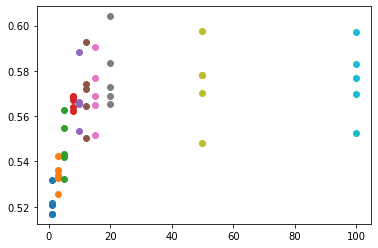

In [49]:
# Visualize the results
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

Text(0, 0.5, 'Cross-validation accuracy')

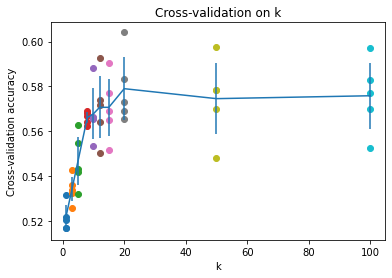

In [50]:
# Get the mean and std and plot
avg_scores = np.mean(scores, axis=1)
stddev_scores = np.std(scores, axis=1)

plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')#### K-Nearest Neighbors Hyperparameter Tuning

Now get the best hyperparameter

In [67]:
best_k = 100

In [68]:
model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


accuracy = compute_accuracy(y_predicted, y_test)
num_correct= np.sum(y_test == y_predicted)
num_test = y_test.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 1001 / 1747 correct => accuracy: 57.298226


In [53]:
>>> from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.

#Convert to dictionary
hyperparameters = {'n_neighbors': np.arange(1, 200, 1)}

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, scoring='accuracy',error_score=0)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
best_k = best_model.best_estimator_.get_params()['n_neighbors']

print('Best n_neighbors:', best_k)

Best n_neighbors: 59


In [54]:
knn = KNeighborsClassifier(n_neighbors = best_k)

knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)


accuracy = compute_accuracy(y_predicted, y_test)
num_correct= np.sum(y_test == y_predicted)
num_test = y_test.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 1221 / 2096 correct => accuracy: 58.253817


### Logistic Regression

TODO: justify why logistic regression

#### Logistic Regression Model Training

#### Logistic Regression Hyperparameter Tuning

### Random Forest

For the third model, random forest was chosen for its benefits including being less prone to overfitting, and being able to extract the importances of each feature used in training *(What is Random Forest?, n.d.)*. Given that random forest extends decision trees' predictive power by taking the average of multiple trees, it better captures the general trend of the provided training data. Additionally, by knowing which features have higher importance in influencing the model's predictions, feature selection could happen where less important features can be removed, resulting in a less complex model.

#### Random Forest Training

To begin training, the feature matrix and target vector are split into train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

A `RandomForestClassifer` object is created and trained with default hyperparameters (as documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). The following are the hyperparameters (and initial values) we will be working with and tuning later on.

- n_estimators = 100
- criterion = "gini"
- min_samples_leaf = 2
- max_features = "sqrt"
- max_samples = None

These hyperparameters were selected given that they were described to have most influence on performance and extraction of feature importance *(Probst et al., 2019)*.

In [ ]:
rfc = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rfc.fit(X_train, y_train)

Predictions can now be made on both the training set and test set.

In [ ]:
predictions_train = rfc.predict(X_train)
acc_train_rf = compute_accuracy(predictions_train, y_train)
print("Random forest classifier train accuracy:", acc_train_rf, "%")

In [ ]:
predictions_test = rfc.predict(X_test)
acc_test_rf = compute_accuracy(predictions_test, y_test)
print("Random forest classifier test accuracy:", acc_test_rf, "%")

The above accuracies show that the model performs very well on the training set but performs poorly on the test set. This shows that the model has **high variance** and is **overfitting**.

#### Random Forest Hyperparameter Tuning

We define the search space for hyperparameter tuning:

In [ ]:
hyperparameters_rf = {
    'n_estimators': [50, 100, 120, 140, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'max_samples': [0.1, 0.3, 0.5, 0.7, 0.9]
}

To tune the hyperparameters of the Random Forest model, the `RandomizedSearchCV` class will be used. We set the the number of combinations to try (n_iter) to `10` and the number of cross valdiation folds to `5`.

In [ ]:
rsr = RandomizedSearchCV(estimator=rfc, param_distributions=hyperparameters_rf, n_iter=30, cv=7, random_state=42)

The models are then trained on the training data to produce the best hyperparameters.

In [ ]:
rsr.fit(X_train, y_train)

In [ ]:
hyperparameters_rf_best = rsr.best_params_
hyperparameters_rf_best

Based on these hyperparameters, we can access the best estimator using these identified hyperparameters as well as its feature importances.

In [ ]:
best_estimator_rf = rsr.best_estimator_

feature_importance = best_estimator_rf.feature_importances_
df_rfc_importance = pd.DataFrame(data=feature_importance, index=data.drop(["target"], axis=1).columns, columns=["importance"])
df_rfc_importance.sort_values(by="importance", ascending=False)

This shows that the 3 most important features are `home_on_target`, `current_minute`, and `away_on_target` while the 3 least important features are `home_yellow_cards`, `away_red_cards`, `home_red_cards`.

Here are the relevant results and metrics from each iteration of random combinations.

In [ ]:
rsr_results = pd.DataFrame(rsr.cv_results_).sort_values(by=["rank_test_score"])
rsr_results

The updated predictions are as follows:

In [ ]:
tuned_predictions_train = best_estimator_rf.predict(X_train)
tuned_acc_train_rf = compute_accuracy(tuned_predictions_train, y_train)
print("Random forest classifier train accuracy:", tuned_acc_train_rf, "%")

In [ ]:
tuned_predictions_test = best_estimator_rf.predict(X_test)
tuned_acc_test_rf = compute_accuracy(tuned_predictions_test, y_test)
print("Random forest classifier test accuracy:", tuned_acc_test_rf, "%")

Compared to the model's initial performance on default hyperparameter values, the variance of the tuned model has lessened given that it performs slightly worse on the training set and slightly better on the test set. Only minimal improvements to prediction accuracy were made using the best hyperparameters identified using the Randomized Search method.

## 7. Model Selection

Here, we exhibit each model's initial configurations and best sets of hyperparameters after tuning. The following are the search spaces defined to find hyperparameters that improve accuracy:

In [ ]:
def printSearchSpace(modelName, hyperparameterSearchSpace):
    print(f"{modelName} Hyperparameter Search Space:\n")
    for key, values in hyperparameterSearchSpace.items():
        print(f"{key}: {values}")

In [ ]:
# TODO: update search space
printSearchSpace("K-Nearest Neighbors", hyperparameters_rf)

In [ ]:
# TODO: update search space
printSearchSpace("Logistic Regression", hyperparameters_rf)

In [ ]:
printSearchSpace("Random Forest", hyperparameters_rf)

After identifying these search spaces, the `RandomizedSearchCV` hyperparameter tuning method was used. The initial hyperparameters were updated to the best ones found as follows:

In [ ]:
def printInitialBestParams(modelName, originalModel, tunedModel, hyperparameterSearchSpace):
    print(f"Initial and Best hyperparameters for {modelName}:")
    params_df = pd.DataFrame({
        'Parameter': list(hyperparameterSearchSpace.keys()),
        'Initial': [originalModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
        'Best': [tunedModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
    })
    return params_df

In [ ]:
# Replace params with knn stuff
printInitialBestParams("K-Nearest Neighbors", rfc, best_estimator_rf, hyperparameters_rf)

In [ ]:
# Replace params with Logistic regression stuff
printInitialBestParams("Logistic Regression", rfc, best_estimator_rf, hyperparameters_rf)

In [ ]:
printInitialBestParams("Random Forest", rfc, best_estimator_rf, hyperparameters_rf)

Using the best hyperparameters identified, the following are the accuracies that were computed for each model.

In [ ]:
# Replace with ur own models stuff

accuracies = [
    ['K-Nearest Neighbors', [acc_train_rf, acc_test_rf], [tuned_acc_train_rf, tuned_acc_test_rf]],
    ['Logistic Regression', [acc_train_rf, acc_test_rf], [tuned_acc_train_rf, tuned_acc_test_rf]],
    ['Random Forest', [acc_train_rf, acc_test_rf], [tuned_acc_train_rf, tuned_acc_test_rf]]
]

pd.DataFrame(accuracies, columns=["Model","Initial (Train, Test)", "Best (Train, Test)"])

Based on these accuracies, we conclude that the (insert model) model is the best suited for the identified task.

## 8. Insights and Conclusions

## 9. References

Probst, P., Wright, M. N., & Boulesteix, A. (2019). Hyperparameters and tuning strategies for Random Forest. WIREs Data Mining and Knowledge Discovery, 9(3). https://doi.org/10.1002/widm.1301 

What is Random Forest?. IBM. (n.d.). https://www.ibm.com/topics/random-forest 